#### import libraries

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



#### read data

In [2]:
col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',"income"]
dfTest = pd.read_csv("test.test",names=col)
dfTrain = pd.read_csv("data.data",names=col)
dfTest["tipo"]="test"
dfTrain["tipo"]="train"
df = pd.concat([dfTest,dfTrain], ignore_index=True)

#### clean data

In [3]:
df.replace(" ?",np.NaN,inplace=True)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,tipo
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,test
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,test
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,test
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,test
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,test


## Exploring atributes

In [4]:
# income
df["income"].replace(" <=50K."," <=50K",inplace=True)
df["income"].replace(" >50K."," >50K",inplace=True)
df["income"]=df["income"].astype("category")
df["income"]=df["income"].cat.codes
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
#age
df['age'] = pd.cut(df['age'], bins = [16, 28, 37, 47, 100], labels = ['Young Adult', 'Adult', 'Middle age','Old'])

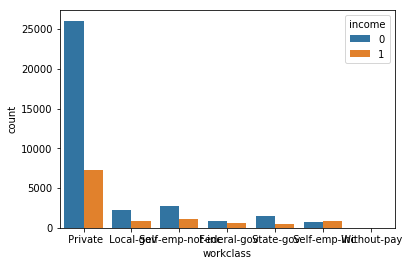

In [6]:
#workclass
df["workclass"].unique()
sns.countplot(x = 'workclass', hue = 'income', data = df)

In [7]:
df["workclass"].value_counts()


 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [8]:
#Final weight
df.corr()


,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
fnlwgt,1.000000,-0.041993,-0.004110,-0.004349,-0.018679,-0.007264
education-num,-0.041993,1.000000,0.126907,0.081711,0.146206,0.332800
capital-gain,-0.004110,0.126907,1.000000,-0.032102,0.083880,0.221034
capital-loss,-0.004349,0.081711,-0.032102,1.000000,0.054195,0.148687
hours-per-week,-0.018679,0.146206,0.083880,0.054195,1.000000,0.227199
income,-0.007264,0.332800,0.221034,0.148687,0.227199,1.000000


In [9]:
df.drop(["fnlwgt"],axis=1,inplace=True)

In [10]:
#Education and education num
x = df["education"].unique()

In [11]:
for i in x:
    print(i,df[df['education'] == i]['education-num'].unique())

 11th [7]
 HS-grad [9]
 Assoc-acdm [12]
 Some-college [10]
 10th [6]
 Prof-school [15]
 7th-8th [4]
 Bachelors [13]
 Masters [14]
 5th-6th [3]
 Assoc-voc [11]
 9th [5]
 Doctorate [16]
 12th [8]
 1st-4th [2]
 Preschool [1]


In [12]:
df.drop(['education-num'], axis = 1, inplace = True)
df['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],' School', inplace = True)
df['education'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 School           5661
 Masters          2514
 Assoc-voc        1959
 Assoc-acdm       1507
 Prof-school       785
 Doctorate         544
Name: education, dtype: int64

In [13]:
# marital status and relationship
df["marital-status"].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

In [14]:
df["relationship"].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

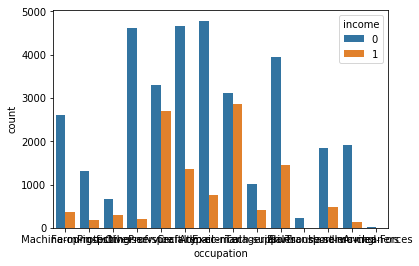

In [15]:
#occupation
sns.countplot(x = 'occupation', hue = 'income', data = df)


In [16]:
df["occupation"].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [17]:
#race
df['race'].value_counts()


 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [18]:
#native-country
df["native-country"].value_counts()



 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 India                           147
 El-Salvador                     147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [19]:
df['native-country'].replace(np.array(df['native-country'].unique())[1:], 'Other', inplace = True)

In [20]:
#capital-gain and loss
df['capital-diff'] = df['capital-gain'] - df['capital-loss']
df.drop(['capital-gain'], axis = 1, inplace = True)
df.drop(['capital-loss'], axis = 1, inplace = True)
df['capital-diff'].describe()

count    45222.000000
mean      1012.834925
std       7530.315380
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-diff, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208D2109F28>]],
      dtype=object)

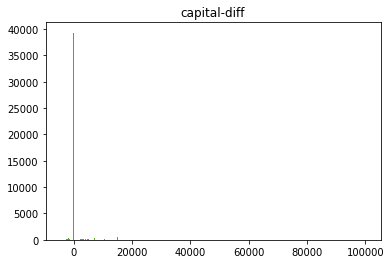

In [21]:

df.hist(column= "capital-diff",bins=500, grid=False, color="#48b41c")

In [22]:
df['capital-diff'] = pd.cut(df['capital-diff'], bins = [-5000, 10,100000], labels = ['Minor', 'Major'])

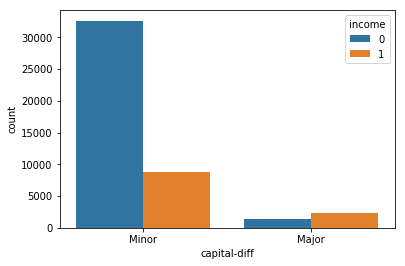

In [23]:
sns.countplot(x = 'capital-diff', hue = 'income', data = df)


In [24]:
#hours-per-week
df['hours-per-week'].describe()


count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [25]:
df['hours-per-week'] = pd.cut(df['hours-per-week'], bins = [0, 31, 44, 100], labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

In [26]:

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,tipo,capital-diff
0,Young Adult,Private,School,Never-married,Machine-op-inspct,Own-child,Black,Male,Normal Hours,United-States,0,test,Minor
1,Middle age,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,Extra Hours,United-States,0,test,Minor
2,Young Adult,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,Normal Hours,United-States,1,test,Minor
3,Middle age,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,Normal Hours,United-States,1,test,Major
5,Adult,Private,School,Never-married,Other-service,Not-in-family,White,Male,Lesser Hours,United-States,0,test,Minor


### Data manipulation

In [27]:
Y = df['income']
X = df.drop(['income'], axis = 1)



In [28]:

YTest = Y[df["tipo"]=="test"]
XTest = X[df["tipo"]=="test"]
YTrain = Y[df["tipo"]=="train"]
XTrain = X[df["tipo"]=="train"]

In [29]:
XTrain=XTrain.drop(['tipo'], axis = 1)
XTest=XTest.drop(['tipo'], axis = 1)
XTrain = pd.get_dummies(XTrain)
XTest = pd.get_dummies(XTest)

### Modeling and training

In [30]:
"""
knn = [3,5,10,20,95,97,100,105,110,120,150,170]
acc=[]
k=[]
for i in knn:
    vec = KNeighborsClassifier(n_neighbors=i)
    vec.fit(XTrain,YTrain)
    Ypred = vec.predict(XTest)
    acc.append(100*accuracy_score(YTest,Ypred))
    k.append(i)
"""

'\nknn = [3,5,10,20,95,97,100,105,110,120,150,170]\nacc=[]\nk=[]\nfor i in knn:\n    vec = KNeighborsClassifier(n_neighbors=i)\n    vec.fit(XTrain,YTrain)\n    Ypred = vec.predict(XTest)\n    acc.append(100*accuracy_score(YTest,Ypred))\n    k.append(i)\n'

In [31]:
#plt.plot(k,acc)


In [32]:
GNB = GaussianNB()
GNB.fit(XTrain,YTrain)
Ypred = GNB.predict(XTest)
100*accuracy_score(YTest,Ypred)

70.87649402390439

In [33]:
vec = KNeighborsClassifier(n_neighbors=95)
vec.fit(XTrain,YTrain)
Ypred = vec.predict(XTest)
100*accuracy_score(YTest,Ypred)

83.85126162018592